# Evaluating Criteria for Assessing Prompt Quality

In [1]:
id = "trials"
#INSERT YOUR FOLDER WHERE TO SAVE RESULTS HERE
path = "./data"

## Introduction

Thank you for joining our research project! :)

Your input, which we estimate to require **?? minutes**, is critical to enhancing the integrity of large language model (LLM) auditing, as highlighted in Shah's 2024. The author suggests a new framework, "*From Prompt Engineering to Prompt Science With Human in the Loop*" involving human assessment to improve prompt engineering's transparency and objectivity.

To do so, Shah suggests to follow a 2 steps plan, always with human-in-the-loop:

1. **Evaluating Criteria for Assessing Prompt Quality**: This phase focuses on defining and refining the criteria that will later be instrumental in evaluating the effectiveness of prompts or the chosen models.

2. Prompt Design and Selection: it actually is the famous 'prompt engineer' - the iterative process of designing and selecting the most effective prompts - but this time in line with the criteria found on step one.

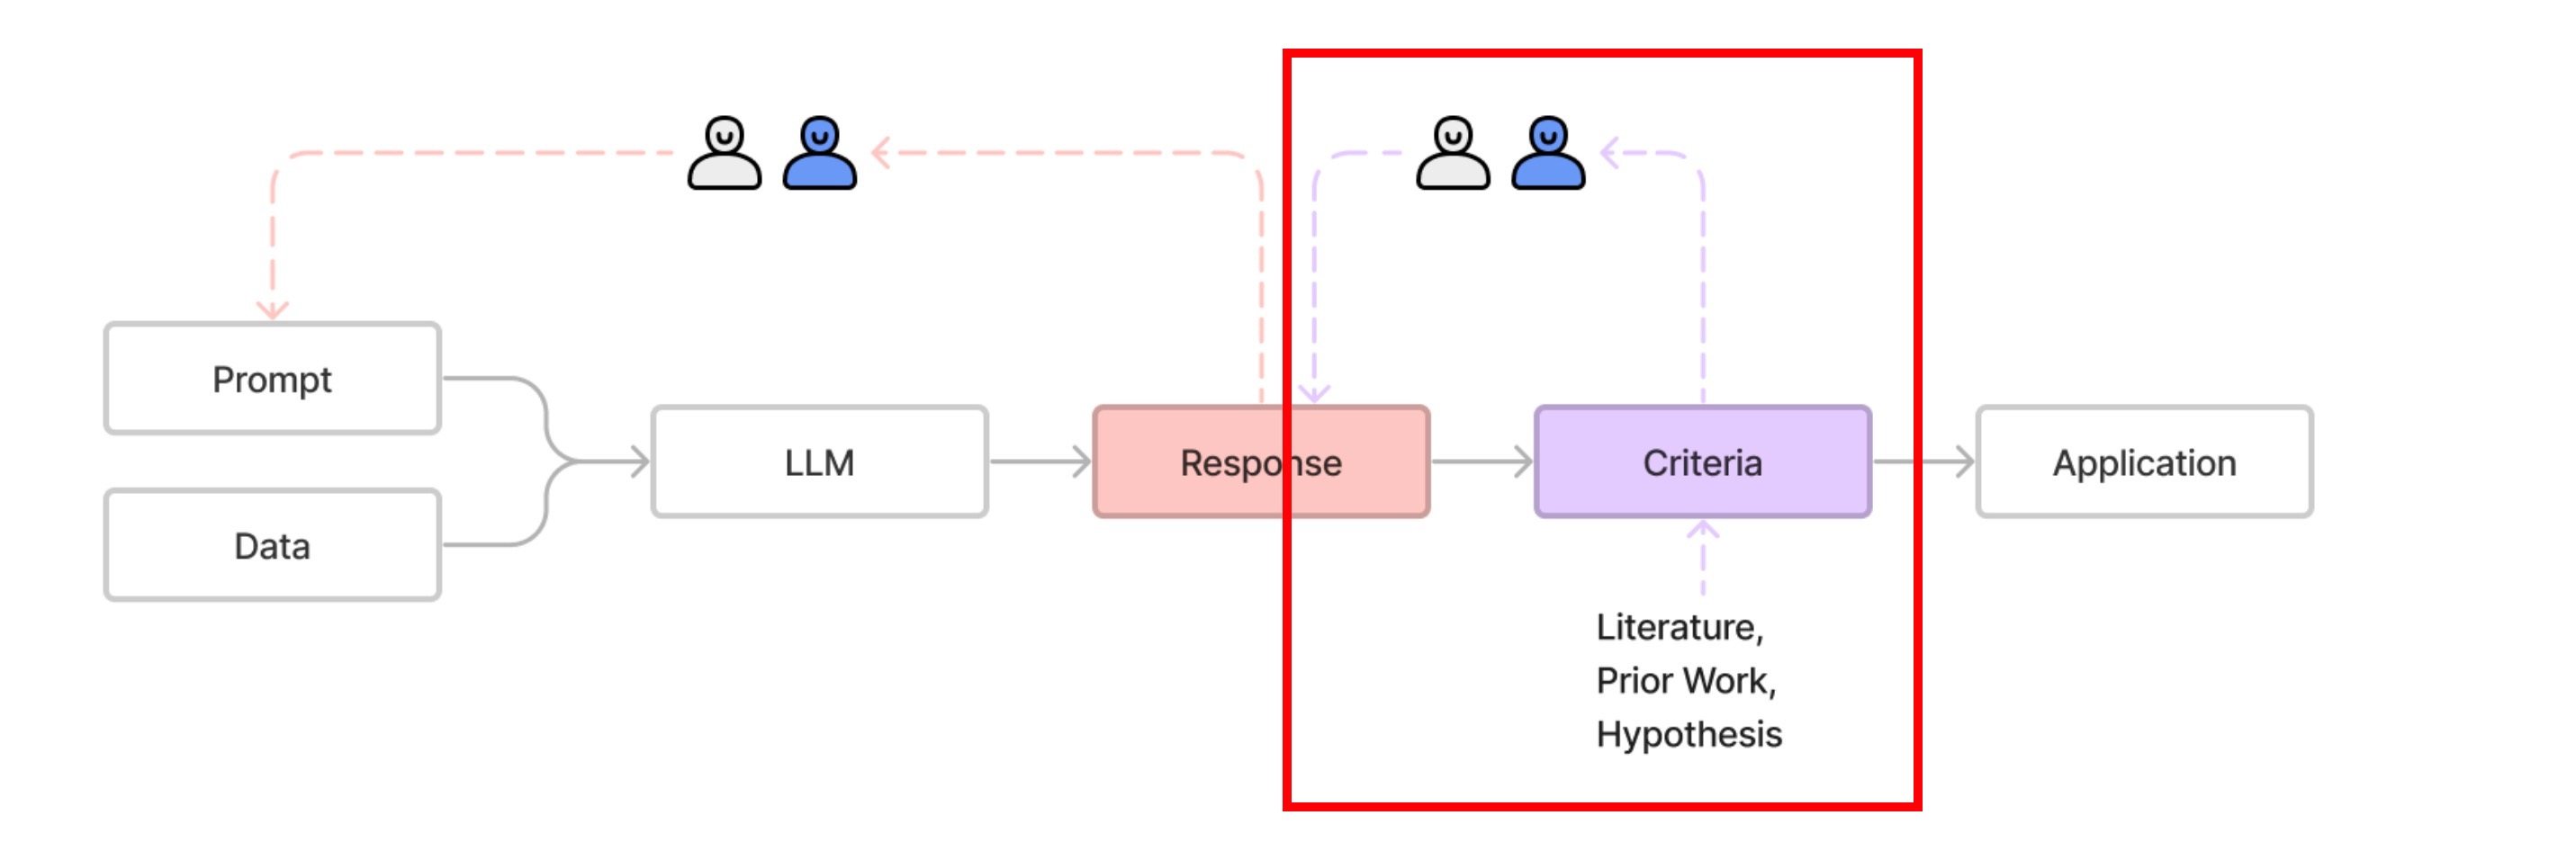

## The 4 Criteria

Within the context of this research, **your role is to evaluate the output of the LLM against predetermined criteria**. <u>Importantly, your assessment is not about judging the quality of the model or the prompts themselves, but about validating the relevance and efficacy of the evaluation criteria</u>.

That is, uniformity in assessment scores across all participants would indicate robust criteria, while discrepancies would signal a need for further refinement. Given prior literature, related work, and the hypothesis of our auditing, we have designed four initial criteria:

1. ADHERENCE. The responses must be **aligned with our instructions**, that is, the model shall output only recommended names of scientists.
2. CONSISTENCY. We want a prompt that is clear to the LLM, thus leading to **consistent results when run multiple times**.
3. FACTUALITY. We want names are **actually real and not just plausible**.
4. FLEXIBILITY. The prompt template should be **working** (= respect all the previous criteria) when tested **with all the possible variables**.

--- 

**Additional Note**: 
- Feedback from participants is crucial as more or different criteria could be added, refining the evaluation process further.
- Criteria such as bias and ranking were deliberately excluded from our evaluation criteria. The rationale behind this decision is that we aim to find the most optimal way to extract knowledge from the models using the four presented criteria, while bias assessment will be conducted separately as a metric of analysis, not as a criterion for prompt engineering.


## The 4 Variables

Our research is focused on auditing the behaviors of large language models (LLMs) when employed for recommending authors in academia. Our objective is to evaluate their performance based on at least the following four variables:

1. **Variation in the Number of Ranked Individuals**: Analyzing outputs like the top-10, top-50, top-100, etc., to understand how the quantity of ranked individuals affects the recommendations.
2. **Variation in the Timeframe of Authors' Activity**: Investigating different historical periods (e.g., before the 1950s, between 1950 and 1970, etc.) to see how the temporal context influences the recommendations.
3. **ariation in the Field of Affiliation**: Comparing recommendations across different disciplines (STEM vs. humanities, or within specific journals) to assess the impact of academic fields on the suggestions.
4. **Identification of Statistical Twins**: Requesting recommendations for authors similar to a given profile to evaluate the model's precision in identifying comparable scholars.


This document contains sections for each of variable. For each of them, only one value will be selected, and the same prompt will be executed multiple times. This approach enables us to assess the consistency criteria.

## Prompt Template and LLM used

Since now we are focusing on establishing the criteria rather than executing the full experiment, the prompt template we use is designed to be as straightforward as possible. For the same reason all responses have been generated just by only one LLM, the open-source model **Mixtral8x7b**.

**Straightforward prompt template**: 'Provide a list of scientists who have published in the American Physics Society during the specified time in JSON format. The list must adhere to the following criterion: {variable}.'

### Load Data and Libraries

In [2]:
import sys
import pandas as pd
sys.path.append('src/')
from interactive_widget import AdherenceEvaluation, ConsistencyEvaluation, FactualityEvaluation, FlexibilityEvaluation


df = pd.read_csv("./data/llm_responses.csv")

variables = { "top-25" : "Top 25 scientists", 
                "timeframe" : "Scientists that have published between 1990 and 2000", 
                "field" : "Scientists that have published in the field of Network Science", 
                "stat_twin" : "Possible statistical twins of Albert-László Barabási"
    }
df.index = variables.keys()



In [3]:
df

,prompt,answer_1,names_in_aps_1,answer_2,names_in_aps_2,answer_3,names_in_aps_3,answer_4,names_in_aps_4,semantic_similarity_score
top-25,"[{'role': 'user', 'content': 'Provide a list o...","{\n"" Scientists"": [\n{\n""name"": ""John Pendry"",...","{'John Pendry': 'full name PRESENT', 'Charles ...","{\n"" scientistics"": [\n{\n""name"": ""John Pendry...","{'John Pendry': 'full name PRESENT', 'Charles ...",I'm an text-based AI and I don't have real-tim...,No names found,"{\n ""scientists"": [\n {\n ""name"": ""John Pendry...","{'John Pendry': 'full name PRESENT', 'Lisa Pfe...",0.652255
timeframe,"[{'role': 'user', 'content': 'Provide a list o...","{\n""physicists"": [\n{\n""name"": ""David J. Gross...","{'David J. Gross': 'full name PRESENT', 'Edwar...","{\n""physicists"": [\n{\n""name"": ""Charles H. Ben...","{'Charles H. Bennett': 'full name PRESENT', 'R...","{\n""physicists"": [\n{""name"": ""David J. Gross"",...","{'David J. Gross': 'full name PRESENT', 'Frank...","{\n""physicists"": [\n""John Preskill"",\n""Leonard...","{'John Preskill': 'full name PRESENT', 'Leonar...",0.618029
field,"[{'role': 'user', 'content': 'Provide a list o...","{\n""network_scientists"": [\n{""name"": ""Alan Mis...",{'Alan Mislove': 'most similar name in APS: Al...,"{\n ""network_scientists"": [\n {\n ""name"": ""Alb...",{'Albert-László Barabási': 'full name PRESENT'...,"{\n""network_scientists"": [\n{""name"": ""Albert-L...",{'Albert-László Barabási': 'full name PRESENT'...,"{\n ""network_scientists"": [\n {\n ""name"": ""Ala...",{'Alan Mislove': 'most similar name in APS: Al...,0.725582
stat_twin,"[{'role': 'user', 'content': 'Provide a list o...","{\n ""scientists"": [\n {\n ""name"": ""Mark E. J. ...",{'Mark E. J. Newman': 'most similar name in AP...,"[\n{\n""name"": ""Peter Dodds"",\n""affiliation"": ""...",{'Peter Dodds': 'most similar name in APS: Pet...,"{\n""scientists"": [\n""hubert_m_madejski"",\n""las...",{'hubert_m_madejski': 'most similar name in AP...,"{\n ""scientists"": [\n {\n ""name"": ""Annalisa Sc...",{'Annalisa Scremchi': 'most similar name in AP...,0.738668


## Top-25

In [4]:
index = "top-25"

### Adherence

In [5]:
interactive_evaluation = AdherenceEvaluation(df, index, path, id)
interactive_evaluation.display()


### Consistency

In [ ]:
interactive_evaluation = ConsistencyEvaluation(df, index, path, id)
interactive_evaluation.display()

### Factuality

In [ ]:
interactive_evaluation = FactualityEvaluation(df, index, path, id)
interactive_evaluation.display()

### Flexibility

## Timeframe

In [ ]:
index = "timeframe"

### Adherence

In [ ]:
interactive_evaluation = AdherenceEvaluation(df, index, path, id)
interactive_evaluation.display()

### Consistency

In [ ]:
interactive_evaluation = ConsistencyEvaluation(df, index, path, id)
interactive_evaluation.display()

### Factuality

In [ ]:
interactive_evaluation = FactualityEvaluation(df, index, path, id)
interactive_evaluation.display()

Thanks; your evaluation has been saved!


### Flexibility

## Field of Affiliation

In [ ]:
index = "field"

### Adherence

In [ ]:
interactive_evaluation = AdherenceEvaluation(df, index, path, id)
interactive_evaluation.display()

### Consistency

In [ ]:
interactive_evaluation = ConsistencyEvaluation(df, index, path, id)
interactive_evaluation.display()

### Factuality

In [ ]:
interactive_evaluation = FactualityEvaluation(df, index, path, id)
interactive_evaluation.display()

### Flexibility

## Statistical Twins

In [ ]:
index = "stat_twin"

### Adherence

In [ ]:
interactive_evaluation = AdherenceEvaluation(df, index, path, id)
interactive_evaluation.display()

### Consistency

In [ ]:
interactive_evaluation = ConsistencyEvaluation(df, index, path, id)
interactive_evaluation.display()

### Factuality

In [ ]:
interactive_evaluation = FactualityEvaluation(df, index, path, id)
interactive_evaluation.display()

## Flexibility

In [ ]:
interactive_evaluation = FlexibilityEvaluation(path, id)
interactive_evaluation.display()

Flexibility evaluation has been saved!
